# Approach
- activity recognition
- sharpness classification
- outputs whether knife needs sharpening

In [1]:
import pandas as pd
import os
import re
import openpyxl

In [2]:
print(os.getcwd())

/home/notvisal/Desktop/Intern/Knife_Sharpness_Dataset


In [3]:
P1_contents = os.listdir('Theme2/P1/Boning/')

print(P1_contents)

['MVN-J-Boning-64-001.xlsx', 'MVN-J-Boning-90-003.xlsx', 'MVN-J-Boning-90-002.xlsx', 'MVN-J-Boning-90-004.xlsx', 'MVN-J-Boning-64-006.xlsx', 'MVN-J-Boning-64-004.xlsx', 'MVN-J-Boning-64-002.xlsx', 'MVN-J-Boning-90-001.xlsx', 'MVN-J-Boning-64-003.xlsx', 'MVN-J-Boning-79-001.xlsx', 'MVN-J-Boning-64-005.xlsx']


In [4]:
P1_BONING_PATHS = [
    'Theme2/P1/Boning/MVN-J-Boning-64-001.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-003.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-002.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-004.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-006.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-004.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-002.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-001.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-003.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-79-001.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-005.xlsx'
]

ACCELERATION_SHEETS = [
    'Segment Acceleration', 
    'Segment Angular Acceleration'
]

ACTIVITY_LABELS = {
    0: 'Idle',
    1: 'Walking', 
    2: 'Steeling',
    3: 'Reaching',
    4: 'Cutting',
    5: 'Dropping'
}

In [5]:
xls_file = pd.ExcelFile(P1_BONING_PATHS[1])

print(xls_file.sheet_names)

df = xls_file.parse('Markers')
df.head(10)

['General Information', 'Markers', 'Segment Orientation - Quat', 'Segment Orientation - Euler', 'Segment Position', 'Segment Velocity', 'Segment Acceleration', 'Segment Angular Velocity', 'Segment Angular Acceleration', 'Joint Angles ZXY', 'Joint Angles XZY', 'Ergonomic Joint Angles ZXY', 'Ergonomic Joint Angles XZY', 'Center of Mass', 'Sensor Free Acceleration', 'Sensor Magnetic Field', 'Sensor Orientation - Quat', 'Sensor Orientation - Euler']


,Frame,Labelling,Unnamed: 2,Unnamed: 3
0,0- 252,0- Idle,Idle,0.0
1,253-417,3- Reaching,Walking,1.0
2,418-1849,4 - Cutting,Steeling,2.0
3,1851-1923,4 - Cutting (offloading bone from Carcass),Reaching,3.0
4,1924-2061,5- Dropping,Cutting,4.0
5,2062-2373,1- Walking,Dropping,5.0
6,2374-2764,2- Steeling,NaN,NaN
7,2765-2875,3- Reaching,NaN,NaN
8,2876-4153,4 - Cutting,NaN,NaN
9,4154-4231,4 - Cutting (offloading bone from Carcass),NaN,NaN


In [6]:
len(df.columns.tolist())

4

In [7]:
# for file in P1_BONING_PATHS:
#     xl = pd.ExcelFile(file)
#     for sheet in ACCELERATION_SHEETS:
#         df = xl.parse(sheet)
#         col = df.columns.tolist()

#         if 'Label' in col:
#             # print(f"{file} {sheet} have label col")
#             continue
#         else:
#             print(f"{file} {sheet} missing label column")
        
#         # print(f"{file}, {sheet}: {df['Label'].isna()}")
    

In [8]:
xl = pd.ExcelFile(P1_BONING_PATHS[1])
df = xl.parse(ACCELERATION_SHEETS[1])

df.head()

,Frame,Label,Pelvis x,Pelvis y,Pelvis z,L5 x,L5 y,L5 z,L3 x,L3 y,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,-1.128749,0.648902,-2.487596,-0.831204,-0.143373,-1.906267,-0.698962,-0.495496,...,-11.281005,0.396790,0.666104,-5.092240,-1.042992,0.438947,-0.256636,-1.042992,0.438947,-0.256636
2,2,0,-0.851040,-0.271079,-1.995743,1.088875,-3.353729,0.853952,1.951060,-4.723795,...,-8.101156,1.039803,1.298700,-2.361782,0.458836,0.217325,-0.207346,0.458836,0.217325,-0.207346
3,3,0,-0.588176,-0.134299,-1.295867,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.141263,0.552980,1.877903,-3.138768,0.248751,0.682828,0.745742,0.000000,0.000000,0.000000
4,4,0,-0.388814,-2.045831,0.103972,-0.715251,-1.160902,-2.188929,-0.860335,-0.767600,...,-8.961113,1.923597,1.152811,0.873384,-0.760524,-0.201851,0.395706,-0.760525,-0.201851,0.395706


In [9]:
# removing the boning 90 003's segment acceleration sheet, since it's missing a column
# or. inject the segment angular acceleration's label column into the segment acceleration sheet


# **Merging**

In [10]:
# from collections import defaultdict

# sharpness_levels = [64, 79, 90]

# def process_acceleration_data(file_paths, sharpness_levels):
#     """Process acceleration data from multiple Excel files with different sharpness levels."""
#     # Dictionary to store processed data by sheet type
#     sheet_data = defaultdict(list)
    
#     # Process all files and extract data by sheet type
#     for file_path, sharpness in zip(file_paths, sharpness_levels):
#         try:
#             xls = pd.ExcelFile(file_path)
            
#             for sheet_name in xls.sheet_names:
#                 if sheet_name not in ACCELERATION_SHEETS:
#                     continue
                
#                 try:
#                     # Read the sheet
#                     df = pd.read_excel(xls, sheet_name=sheet_name)
#                     print(f"{df.shape}")
                    
#                     if df.empty:
#                         continue

#                     if 'Label' not in df.columns:
#                         print(f"Skipping {sheet_name} since it doesn't have a label column")
#                         continue
                    
#                     # Add sharpness column
#                     df['sharpness'] = sharpness
                    
#                     # Add sheet name as a column to differentiate data source
#                     df['sheet_type'] = sheet_name
                    
#                     # Add to our collection
#                     sheet_data[sheet_name].append(df)
                
#                 except Exception as e:
#                     print(f"Error processing sheet {file_path} {sheet_name}: {e}")
        
#         except Exception as e:
#             print(f"Error processing file {file_path}: {e}")
    
#     # Combine data from all files
#     combined_dfs = []
    
#     for sheet_name, dfs in sheet_data.items():
#         if dfs:
#             # Concatenate all data for this sheet type
#             sheet_combined_df = pd.concat(dfs, ignore_index=True)
#             combined_dfs.append(sheet_combined_df)
    
#     # Return combined data frame
#     if combined_dfs:
#         final_df = pd.concat(combined_dfs, ignore_index=True)
#         return final_df
    
#     return None

# def main():
#     # Process the data
#     merged_df = process_acceleration_data(
#         file_paths=P1_BONING_PATHS,
#         sharpness_levels=sharpness_levels
#     )
    
#     if merged_df is None or merged_df.empty:
#         print("No results generated!")
#         return
    
#     # Save the final merged dataframe
#     output_file = "acceleration_data.csv"
#     merged_df.to_csv(output_file, index=False)
#     print(f"Saved data to {output_file} ({merged_df.shape[0]} rows, {merged_df.shape[1]} columns)")

# if __name__ == "__main__":
#     main()

In [11]:
df = pd.read_csv('acceleration_data.csv')

df.head()

,Frame,Label,Pelvis x,Pelvis y,Pelvis z,L5 x,L5 y,L5 z,L3 x,L3 y,...,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z,sharpness,sheet_type
0,0,4,0.0,0.0,0.0,-1.640562,-0.345798,-0.666146,-2.369700,-0.499486,...,-2.060481,-1.485525,-2.185359,-1.194785,-1.663235,-2.185359,-1.194785,-1.663235,64,Segment Acceleration
1,1,4,0.0,0.0,0.0,-0.705326,-0.629461,-0.983502,-1.043948,-0.907626,...,-2.689504,-1.314239,-1.060466,-1.162565,-1.845591,-1.064713,-1.147108,-1.845636,64,Segment Acceleration
2,2,4,0.0,0.0,0.0,-1.146854,-0.839369,-0.862127,-1.683033,-1.219342,...,-2.178955,-1.321744,-0.220440,-1.530509,-1.658241,-0.227187,-1.514522,-1.657987,64,Segment Acceleration
3,3,4,0.0,0.0,0.0,-0.065640,-0.431009,-0.488192,-0.426137,-0.574987,...,-0.951495,-1.324380,-0.175790,-1.007643,-1.326566,-0.091278,-0.986575,-1.316862,64,Segment Acceleration
4,4,4,0.0,0.0,0.0,0.652927,-0.046127,0.174043,0.920047,-0.080622,...,-0.402592,-0.509365,0.347853,-0.509991,-0.538392,0.335083,-0.493518,-0.537629,64,Segment Acceleration


In [12]:
df.shape

(67354, 73)

# **Visualization**

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for plotting
sns.set(style="whitegrid")

# Define the activity label mapping
ACTIVITY_LABELS = {
    0: 'Idle',
    1: 'Walking', 
    2: 'Steeling',
    3: 'Reaching',
    4: 'Cutting',
    5: 'Dropping'
}

def downsample_data(df, column_name, downsample_factor=10):
    """
    Downsample data to reduce density in visualization
    
    Parameters:
    - df: DataFrame to downsample
    - column_name: Column to use for grouping (usually the time or index column)
    - downsample_factor: Number of samples to combine into one
    
    Returns:
    - Downsampled DataFrame
    """
    # Create a group identifier
    df['group'] = np.floor(np.arange(len(df)) / downsample_factor).astype(int)
    
    # Group by the identifier and calculate means
    # Also keep the activity code and sharpness values (use mode/most common value)
    grouped = df.groupby(['group', 'sharpness', 'activity_code']).agg({
        value_column: 'mean',
        'Label': 'first'  # Keep the original label
    }).reset_index()
    
    return grouped

def create_facet_plots(df, time_column=None, value_column='Right Hand x', downsample_factor=None):
    """
    Create faceted plots separated by sharpness to improve readability.
    
    Parameters:
    - df: The merged DataFrame containing the acceleration data
    - time_column: The column name containing time/sequence information (optional)
    - value_column: The column containing the acceleration values to plot
    - downsample_factor: Factor by which to downsample data (e.g., 10 means take every 10th point)
    """
    # Make a copy of the dataframe to avoid modifying the original
    plot_df = df.copy()
    
    # Get activity label codes
    try:
        # Try to extract activity codes from 'Label'
        plot_df['activity_code'] = plot_df['Label'].apply(lambda x: float(str(x).split('.')[-1]) 
                                           if isinstance(x, str) and '.' in str(x) 
                                           else int(float(x)) if str(x).replace('.', '').isdigit() 
                                           else x)
    except KeyError:
        # If 'Label' doesn't exist, create a placeholder
        print("Warning: 'Label' column not found. Please verify your column names.")
        plot_df['activity_code'] = 0  # Default to the first activity
    
    # Map numerical codes to activity names
    plot_df['activity_name'] = plot_df['activity_code'].map(lambda x: ACTIVITY_LABELS.get(int(x), f"Activity {x}"))
    
    # Get unique sharpness levels
    sharpness_levels = sorted(plot_df['sharpness'].unique())
    
    # Create a figure with a subplot for each sharpness level
    fig, axes = plt.subplots(len(sharpness_levels), 1, figsize=(15, 5*len(sharpness_levels)), sharex=True)
    
    # If there's only one sharpness level, axes won't be an array
    if len(sharpness_levels) == 1:
        axes = [axes]
    
    # Create a color palette for activity labels
    activity_names = list(ACTIVITY_LABELS.values())
    activity_palette = sns.color_palette("Set1", len(activity_names))
    activity_colors = {name: color for name, color in zip(activity_names, activity_palette)}
    
    # Plot each sharpness level in its own subplot
    for i, sharpness in enumerate(sharpness_levels):
        ax = axes[i]
        sharpness_data = plot_df[plot_df['sharpness'] == sharpness]
        
        for activity_code, activity_name in ACTIVITY_LABELS.items():
            label_data = sharpness_data[sharpness_data['activity_code'] == activity_code]
            
            if not label_data.empty:
                # If downsampling is requested
                if downsample_factor and downsample_factor > 1:
                    # Downsample by taking every Nth point
                    label_data = label_data.iloc[::downsample_factor].copy()
                
                # If no time column is provided, use the index or create a sequence
                if time_column is None or time_column not in label_data.columns:
                    x_values = np.arange(len(label_data))
                else:
                    # Sort by time column
                    label_data = label_data.sort_values(by=time_column)
                    x_values = label_data[time_column]
                
                # Plot the data
                ax.plot(
                    x_values,
                    label_data[value_column],
                    label=activity_name,
                    color=activity_colors[activity_name],
                    linewidth=2,
                    alpha=0.8
                )
        
        # Set titles and labels
        ax.set_title(f'Sharpness Level: {sharpness}', fontsize=16)
        ax.set_ylabel(value_column, fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend(loc='upper right')
    
    # Set the bottom x-axis label
    if time_column and time_column in plot_df.columns:
        axes[-1].set_xlabel(time_column, fontsize=12)
    else:
        axes[-1].set_xlabel('Sample Index', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

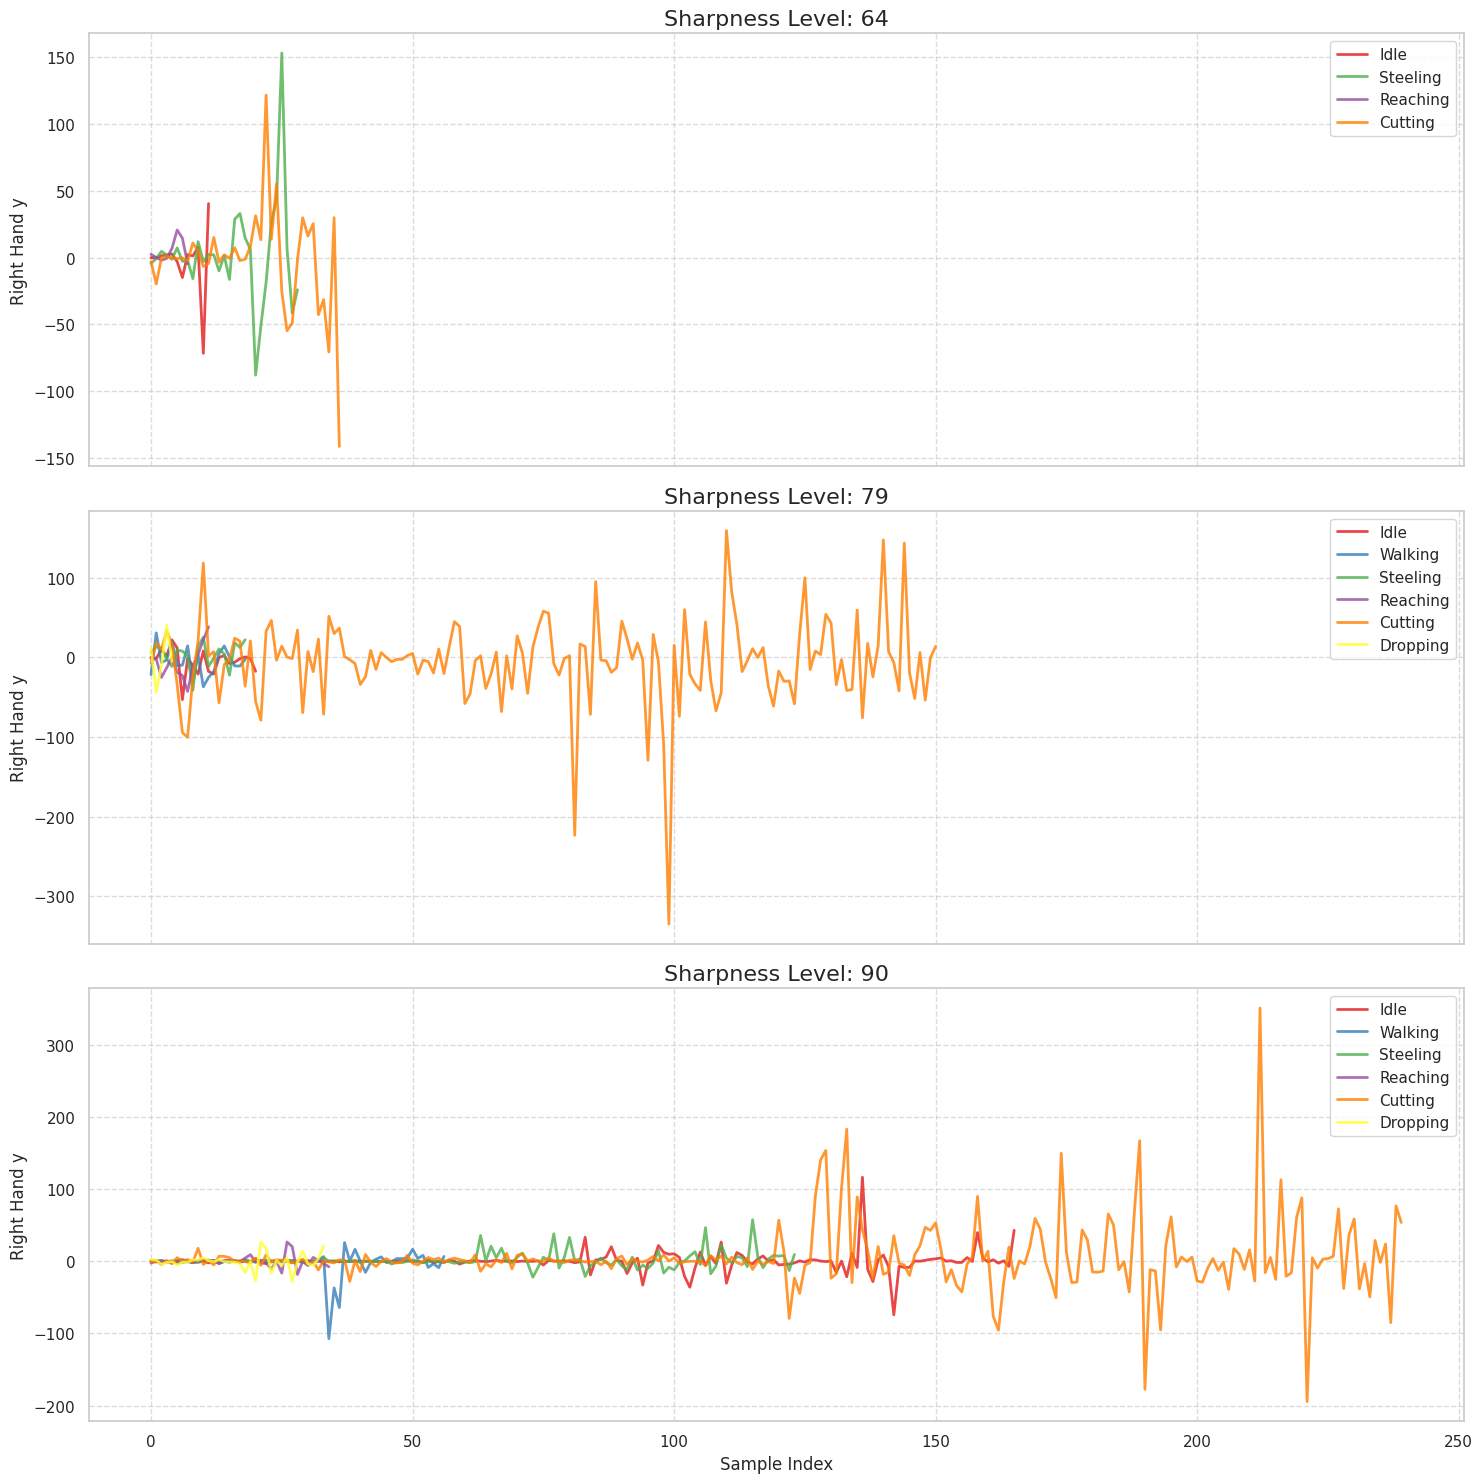

In [14]:
create_facet_plots(
    df,
    value_column='Right Hand y',
    downsample_factor=70
)

In [16]:
# df.columns.tolist()

# **DATA splitting**

In [17]:
import tensorflow as tf
from keras import layers

train_dataset = df.sample(frac=0.8, random_state=42)
test_dataset = df.drop(train_dataset.index)

numeric_cols = df.select_dtypes(include=['int', 'int64', 'float', 'float64']).columns.tolist()

train_features = train_dataset[numeric_cols].copy()
test_features = test_dataset[numeric_cols].copy()

train_labels = train_features.pop('sharpness')
test_labels = test_features.pop('sharpness')

2025-03-30 01:29:15.941484: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-30 01:29:15.947777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743258555.953301    9068 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743258555.954932    9068 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743258555.960172    9068 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# **Pipeline implementation**

In [18]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, initializers

categorical_features = [train_features.columns.get_loc('Label')]

majority_class_count = train_labels.value_counts().max()

unique_sharpness = np.sort(np.unique(train_labels))
sampling_strategy = {
    sharpness: majority_class_count for sharpness in unique_sharpness
}

In [19]:
smote_nc = SMOTENC(
    categorical_features=categorical_features,
    sampling_strategy=sampling_strategy,
    random_state=42
)

In [20]:
X_resampled, y_resampled = smote_nc.fit_resample(train_features.values, train_labels.values)

print(len(X_resampled))

109674


In [21]:
# Check the class distribution after resampling
unique_values, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique_values, counts))
print("\nClass distribution after SMOTE:")
for class_value, count in sorted(class_distribution.items()):
    print(f"Sharpness {class_value}: {count} samples")


Class distribution after SMOTE:
Sharpness 64: 36558 samples
Sharpness 79: 36558 samples
Sharpness 90: 36558 samples


In [22]:
# adding the oversampled columns back to a dataframe for visualization
resampled_df = pd.DataFrame(X_resampled, columns=train_features.columns.tolist())
resampled_df['sharpness'] = y_resampled

resampled_df.shape

(109674, 72)

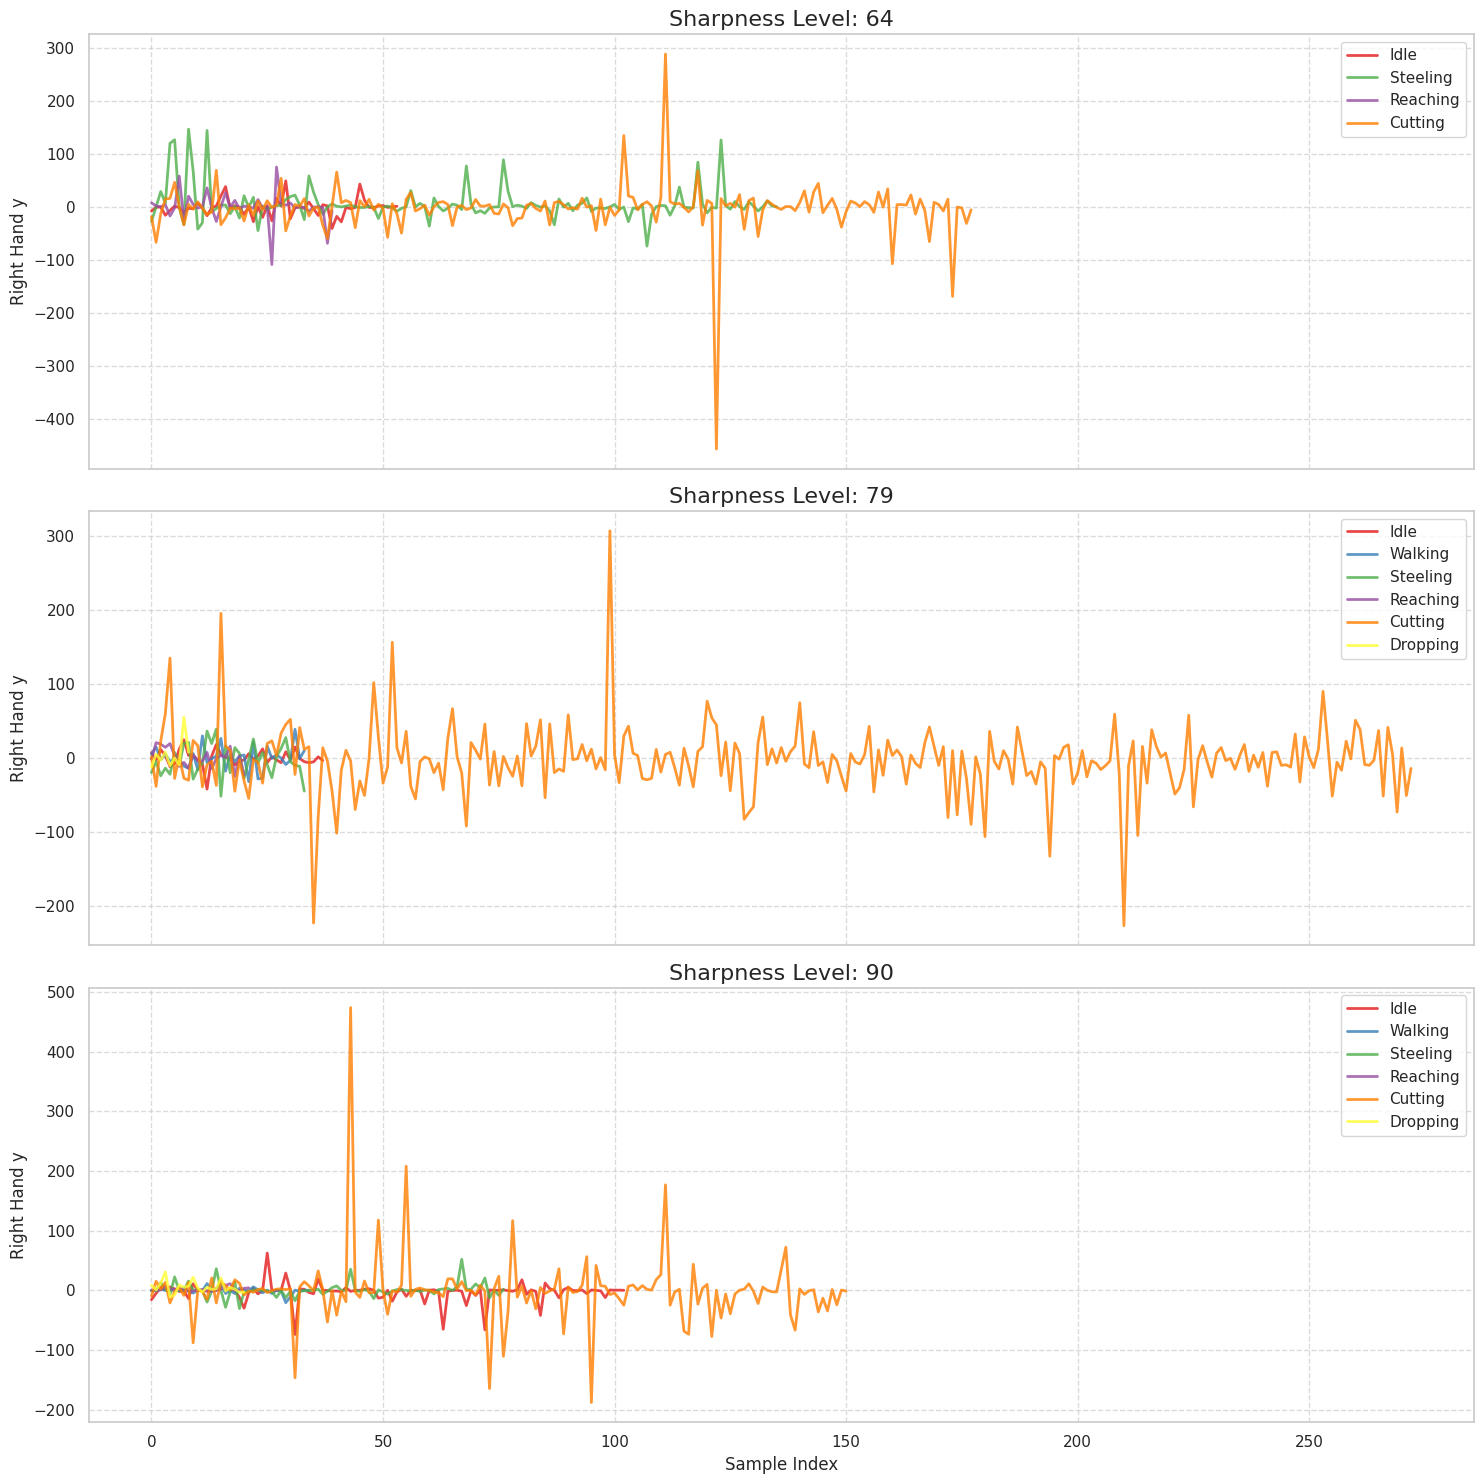

In [23]:
create_facet_plots(
    resampled_df,
    value_column='Right Hand y',
    downsample_factor=90
)

In [24]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(X_resampled)

X_train_processed = normalizer(X_resampled).numpy()
X_test_processed = normalizer(test_features.values).numpy()
y_train_processed = y_resampled

# check the normalized data
print(f"Min value in normalized data: {X_train_processed.min()}")
print(f"Max value in normalized data: {X_train_processed.max()}")
print(f"Mean value in normalized data: {X_train_processed.mean()}")
print(f"Standard deviation in normalized data: {X_train_processed.std()}")

I0000 00:00:1743258630.288137    9068 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5506 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Min value in normalized data: -50.20664978027344
Max value in normalized data: 46.40349197387695
Mean value in normalized data: 1.91252813586118e-09
Standard deviation in normalized data: 1.0000001192092896


### **Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_processed, y_train_processed)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [26]:
# make predictions on the test set

predictions = rf_model.predict(X_test_processed)

In [27]:
print(f"Classificaton report: ")
print(classification_report(test_labels.values, predictions))

Classificaton report: 
              precision    recall  f1-score   support

          64       0.78      0.99      0.88      1220
          79       0.66      0.96      0.78      3127
          90       0.99      0.80      0.89      9124

    accuracy                           0.86     13471
   macro avg       0.81      0.92      0.85     13471
weighted avg       0.90      0.86      0.86     13471



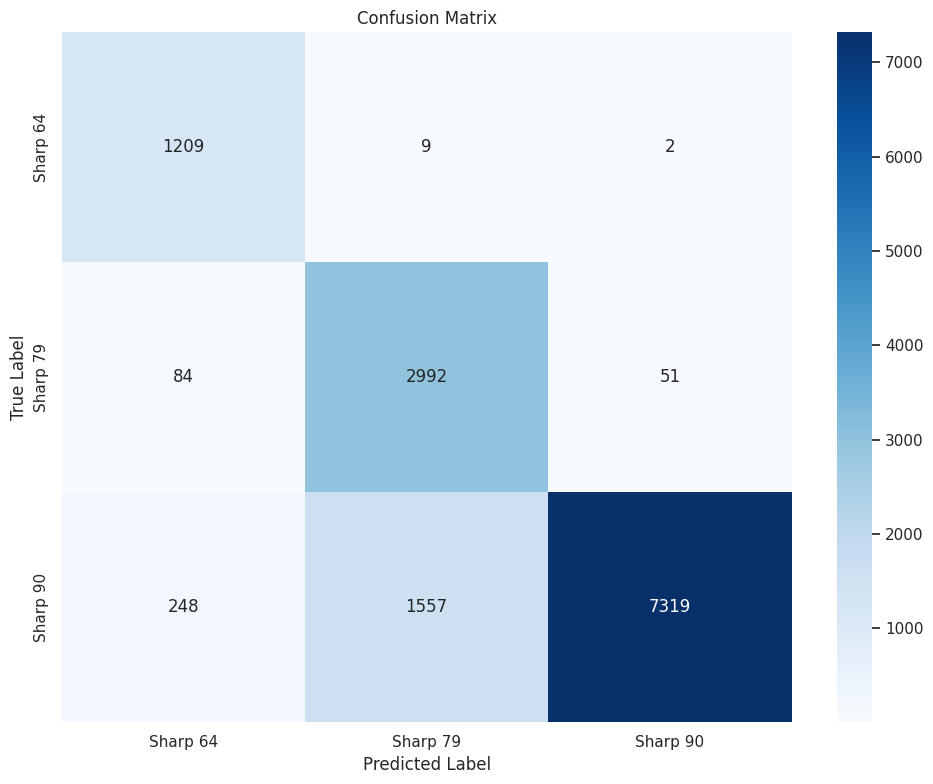

In [28]:
# Create the confusion matrix
cm = confusion_matrix(test_labels.values, predictions)

# Get unique class labels
unique_classes = np.sort(np.unique(np.concatenate([test_labels.values, predictions])))
class_labels = [f'Sharp {val}' for val in unique_classes]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# **Feature Evaluation**